In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submit = pd.read_csv('sampleSubmission.csv')

In [4]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train_df.shape

(15120, 56)

In [6]:
test_df.shape

(565892, 55)

In [7]:
train_df = train_df.drop(columns=['Id'],axis=1)
test_df = test_df.drop(columns=['Id'],axis=1)

In [8]:
x = train_df.drop(columns=['Cover_Type'],axis = 1)
y = train_df['Cover_Type']

In [9]:
x.shape

(15120, 54)

In [10]:
test_df.shape

(565892, 54)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [13]:
train_df.isnull().sum() 

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [14]:
train_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [19]:
corr = train_df.corr()

In [20]:
plt.style.use('seaborn')
corr.style.background_gradient(cmap='PuBu').set_precision(2)

C:\Users\sanatan\AppData\Local\Temp\ipykernel_9552\1699837870.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='PuBu').set_precision(2)
C:\Users\sanatan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\sanatan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\io\formats\style.py:3927: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.00,-0.01,-0.31,0.41,0.12,0.58,0.10,0.22,0.09,0.44,0.33,0.26,0.35,-0.78,-0.22,-0.15,-0.31,-0.13,-0.14,-0.19,nan,0.00,-0.01,-0.36,-0.04,0.02,0.04,-0.14,nan,-0.07,-0.20,-0.04,0.03,0.01,0.03,0.15,0.16,0.10,0.01,0.02,0.04,-0.00,0.17,0.05,0.09,0.17,0.12,0.02,0.12,0.04,0.07,0.32,0.30,0.31,0.02
Aspect,-0.01,1.00,0.03,0.04,0.06,0.07,-0.59,0.32,0.64,-0.05,-0.13,0.03,0.03,0.08,-0.02,-0.02,-0.07,0.02,0.00,-0.01,nan,0.00,-0.02,0.11,-0.03,-0.04,0.02,0.00,nan,0.03,0.03,-0.04,0.01,-0.02,0.02,0.02,0.04,0.01,-0.00,-0.01,0.02,0.03,-0.06,-0.09,0.01,0.00,0.02,0.01,-0.00,0.00,-0.05,0.04,-0.03,0.01,0.01
Slope,-0.31,0.03,1.00,-0.06,0.27,-0.28,-0.20,-0.61,-0.33,-0.24,-0.15,-0.07,-0.11,0.29,0.10,-0.08,0.27,0.09,0.07,-0.05,nan,-0.01,-0.02,0.26,-0.11,-0.12,0.12,-0.05,nan,-0.06,-0.12,-0.07,-0.05,-0.07,-0.03,-0.08,-0.18,0.02,0.01,-0.03,0.01,0.04,-0.08,0.12,-0.08,-0.15,0.07,-0.03,-0.05,-0.00,0.00,-0.15,0.05,-0.04,0.09
Horizontal_Distance_To_Hydrology,0.41,0.04,-0.06,1.00,0.65,0.20,-0.03,0.08,0.08,0.16,-0.01,0.09,0.20,-0.24,-0.08,0.02,-0.09,-0.06,-0.03,0.02,nan,0.00,-0.01,-0.11,0.03,0.03,0.03,-0.11,nan,-0.08,-0.16,-0.02,-0.03,-0.06,-0.03,-0.01,-0.09,0.05,-0.00,0.03,0.06,0.02,0.03,-0.03,0.06,0.14,0.06,0.07,-0.02,0.08,-0.01,0.13,0.07,0.24,-0.01
Vertical_Distance_To_Hydrology,0.12,0.06,0.27,0.65,1.00,0.01,-0.10,-0.13,-0.04,-0.02,-0.12,0.02,0.07,0.03,-0.03,0.01,0.07,-0.02,0.02,0.09,nan,-0.01,-0.01,0.02,-0.03,-0.03,0.09,-0.09,nan,-0.07,-0.16,-0.04,-0.04,-0.07,-0.02,-0.06,-0.14,0.02,-0.01,-0.02,0.05,0.05,-0.06,-0.00,0.01,0.02,0.08,0.03,-0.02,0.02,-0.02,-0.01,0.06,0.23,0.08
Horizontal_Distance_To_Roadways,0.58,0.07,-0.28,0.20,0.01,1.00,-0.00,0.24,0.17,0.49,0.37,-0.08,0.12,-0.44,-0.12,-0.09,-0.16,-0.09,-0.09,-0.14,nan,0.02,-0.02,-0.21,-0.08,0.08,0.00,-0.07,nan,-0.01,-0.08,-0.04,0.06,0.05,-0.00,0.11,0.13,0.02,-0.01,0.03,0.03,-0.01,0.27,-0.06,0.03,0.03,0.05,0.02,0.07,0.03,0.06,0.20,0.12,0.14,-0.11
Hillshade_9am,0.10,-0.59,-0.20,-0.03,-0.10,-0.00,1.00,-0.01,-0.78,0.08,0.17,-0.01,-0.02,-0.14,0.03,0.06,0.24,0.05,-0.06,0.02,nan,0.00,0.01,-0.39,0.03,0.05,0.01,-0.01,nan,-0.00,-0.02,0.03,-0.01,0.01,-0.01,-0.00,-0.00,-0.05,0.01,0.02,-0.02,-0.06,0.06,0.17,-0.02,0.02,-0.05,0.00,0.03,0.01,0.01,0.01,0.02,-0.02,-0.01
Hillshade_Noon,0.22,0.32,-0.61,0.08,-0.13,0.24,-0.01,1.00,0.61,0.12,-0.01,0.04,0.19,-0.20,-0.03,0.09,-0.09,0.15,-0.09,0.03,nan,0.01,0.00,-0.28,0.04,0.05,0.00,0.01,nan,0.05,0.08,0.03,0.04,0.02,0.03,0.05,0.13,-0.05,-0.00,0.04,0.03,0.01,-0.00,-0.14,0.04,0.10,-0.01,0.03,0.03,0.03,-0.04,0.10,-0.06,-0.01,-0.10
Hillshade_3pm,0.09,0.64,-0.33,0.08,-0.04,0.17,-0.78,0.61,1.00,0.04,-0.12,0.04,0.13,-0.05,-0.06,0.01,-0.30,0.02,-0.01,0.01,nan,0.00,-0.00,0.13,0.02,0.01,-0.03,0.02,nan,0.04,0.08,0.00,0.03,0.01,0.02,0.04,0.10,0.01,-0.01,0.01,0.02,0.05,-0.03,-0.22,0.05,0.06,0.02,0.02,0.00,0.00,-0.03,0.07,-0.06,0.02,-0.05
Horizontal_Distance_To_Fire_Points,0.44,-0.05,-0.24,0.16,-0.02,0.49,0.08,0.12,0.04,1.00,0.43,0.04,0.01,-0.42,-0.11,-0.10,-0.15,-0.06,-0.07,-0.11,nan,0.02,-0.01,-0.21,-0.03,0.20,-0.05,-0.09,nan,0.02,-0.06,0.21,0.02,0.08,-0.01,0.05,0.08,0.05,0.02,0.05,0.01,-0.00,0.26,0.03,-0.02,0.02,0.05,-0.01,0.00,-0.01,0.03,0.09,0.05,0.13,-0.09


In [23]:
train_df.corr().unstack().sort_values().drop_duplicates()

Wilderness_Area4                  Elevation                        -0.783651
Hillshade_9am                     Hillshade_3pm                    -0.779965
Slope                             Hillshade_Noon                   -0.612613
Hillshade_9am                     Aspect                           -0.593997
Wilderness_Area4                  Wilderness_Area3                 -0.569200
                                                                      ...   
Hillshade_3pm                     Hillshade_Noon                    0.614526
Aspect                            Hillshade_3pm                     0.635022
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology    0.652142
Elevation                         Elevation                         1.000000
                                  Soil_Type7                             NaN
Length: 1380, dtype: float64

In [39]:
counts = y.value_counts()

In [40]:
counts

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7876984126984127


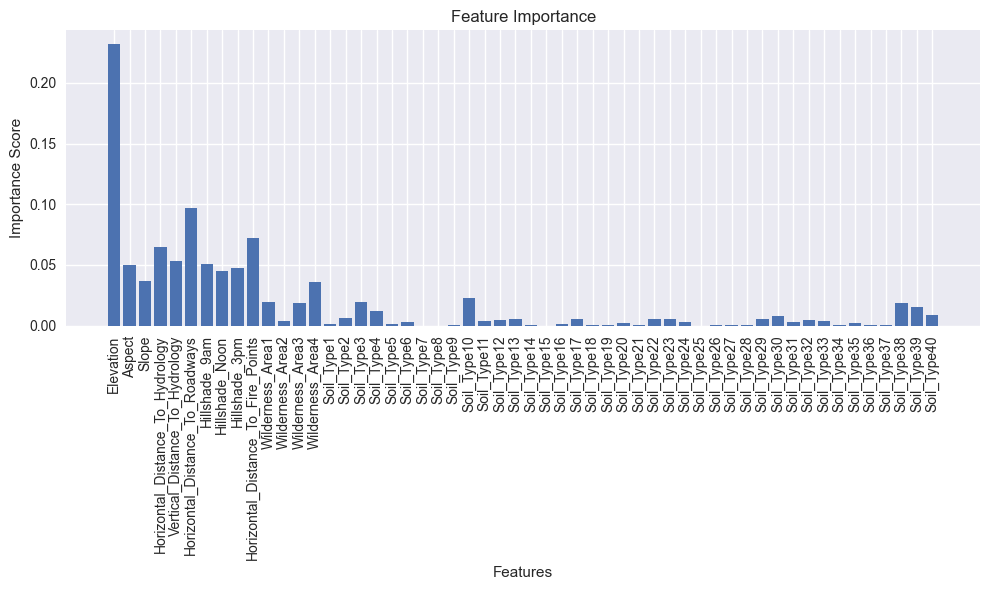

In [44]:
feature_importances = rf_classifier.feature_importances_
feature_importances

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), x.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [62]:
from sklearn.svm import SVC

In [63]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [64]:
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [65]:
accuracy

0.6256613756613757

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7876984126984127


In [72]:
y_pred_random = rf_classifier.predict(test_df)
submit['Cover_Type']=y_pred_random
submit.to_csv('sample_submission.csv', index=False)